# pybot_arm

**Group: Gabriela Abadia, Devin Doyle, Hannah Sweatland**

## What is pybot-arm?

`pybot_arm` is a Python package created to solve the robot arm benchmark optimal control problem. The goal of this problem is to determine the set of controls that minimize the time taken for a robot arm to complete a user-specified manuever in minimal time.

`pybot_arm` is a high-level package that utilizes the following Python packages:
- `casadi`: open-source tool for nonlinear optimization and algorithmic differentiation
- `python-control`: toolbox for the analysis and design of feedback control systems
- `matplotlib`

Supplemental packages:
- `numpy`
- `csv`
- `pathlib`

## Background

Consider the following optimal control problem:

$ \min t_f $

subject to the following dynamic constraints

$ L \ddot{\rho} = u_{\rho}, \qquad I_{\theta} \ddot{\theta} = u_{\theta}, \qquad I_{\phi} \ddot{\phi} = u_{\phi}$,

state bounds

$ \rho(t) \in [0,L], \qquad |\theta(t)| \leq \pi, \qquad 0 \leq \phi(t) \leq \pi$,

control bounds

$ |u_{\rho}| \leq 1, \qquad |u_{\theta}| \leq 1, \qquad |u_{\phi}| \leq 1 $,

and boundary conditions

$ \begin{matrix} (\rho(0),\rho(t_f)) = (\rho_0,\rho_f) & (\theta(0),\theta(t_f)) = (\theta_0,\theta_f) & (\phi(0),\phi(t_f)) = (\phi_0,\phi_f) \\ (\dot{\rho}(0),\dot{\rho}(t_f)) = (\dot{\rho}_0,\dot{\rho}_f) & (\dot{\theta}(0),\dot{\theta}(t_f)) = (\dot{\theta}_0,\dot{\theta}_f) & (\dot{\phi}(0),\dot{\phi}(t_f)) = (\dot{\phi}_0,\dot{\phi}_f)\end{matrix}$

Reference: Dolan, Elizabeth D., Jorge J. Moré, and Todd S. Munson. Benchmarking optimization software with COPS 3.0. No. ANL/MCS-TM-273. Argonne National Lab., Argonne, IL (US), 2004.
(https://www.mcs.anl.gov/~tmunson/papers/cops.pdf)

## pybot_ocp

In [1]:
import pybot_arm.pybot_ocp as ocp
import numpy as np

First we need to define the following parameters:
- `N`: number of control intervals (since we are discretizing the problem)
- `L`: length of the robot arm
- `bounds`: boundary conditions for all state variables

Use `ocp.format_bounds(rho,rho_dot,theta,theta_dot,phi,phi_dot)`

In [2]:
N = 100

L = 5

bounds = ocp.format_bounds(rho=[4.5,4.5],
                           rho_dot=[0,0],
                           theta=[0,2*np.pi/3],
                           theta_dot=[0,0],
                           phi=[np.pi/4,np.pi/4],
                           phi_dot=[0,0])

Next, we simply pass our parameters into `ocp.solve_pybot(N,L,bounds)` to obtain the optimal solution (if one exists).

In [3]:
sol = ocp.solve_pybot(N,L,bounds)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     4512
Number of nonzeros in inequality constraint Jacobian.:      604
Number of nonzeros in Lagrangian Hessian.............:     3501

Total number of variables............................:      907
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

In [4]:
sol

(OptiSol(Opti {
   instance #0
   #variables: 3 (nx = 907)
   #parameters: 0 (np = 0)
   #constraints: 117 (ng = 1216)
   CasADi solver allocated.
   CasADi solver was called: Solve_Succeeded
 }),
 {'N': 100,
  'L': 5,
  'X': MX(opti0_x_1),
  'U': MX(opti0_x_2),
  'T': MX(opti0_x_3)})

The output from `ocp.solve_pybot` is a tuple that contains a `casadi.OptiSol` object of the solution and a dictionary of some of the problem setup parameters.

Notice that X (state variables), U (control variables), and T (final time variable) are `casadi.MX` type. This stands for matrix expression, a symbolic type from the CasADI library. These symbolic representations of variables are useful for extracting data from the `casadi.OptiSol` object.

Lastly, we can use `ocp.export_to_csv(sol,filename,path=str(pathlib.Path.cwd()))` to create a file with our solution.

In [5]:
ocp.export_to_csv(sol,"pybot_example")

We can also extract the data from the `casadi.OptiSol` object directly without creating a csv file using `ocp.parse_sol(sol)` 

In [6]:
time, X, X_dot, U = ocp.parse_sol(sol)

In [7]:
print(f"time:{time.shape}")
print(f"X:{X.shape}")
print(f"U:{U.shape}")

time:(101,)
X:(6, 101)
U:(3, 101)


In [8]:
time[-1]

9.141188362661488

Notice that U[:,-1] = nan since the control is not computed at the final grid point.

In [9]:
U[0]

array([-0.99999993, -0.99999993, -0.99999992, -0.99999992, -0.99999991,
       -0.9999999 , -0.99999989, -0.99999989, -0.99999987, -0.99999986,
       -0.99999985, -0.99999983, -0.99999982, -0.99999979, -0.99999977,
       -0.99999973, -0.99999969, -0.99999964, -0.99999958, -0.99999948,
       -0.99999934, -0.99999912, -0.99999871, -0.99999768, -0.99999103,
        0.99999482,  0.99999796,  0.9999987 ,  0.99999903,  0.99999922,
        0.99999934,  0.99999942,  0.99999948,  0.99999953,  0.99999956,
        0.99999959,  0.99999961,  0.99999963,  0.99999965,  0.99999966,
        0.99999967,  0.99999968,  0.99999968,  0.99999969,  0.99999969,
        0.99999969,  0.99999969,  0.9999997 ,  0.9999997 ,  0.9999997 ,
        0.9999997 ,  0.9999997 ,  0.9999997 ,  0.99999969,  0.99999969,
        0.99999969,  0.99999969,  0.99999968,  0.99999968,  0.99999967,
        0.99999966,  0.99999965,  0.99999963,  0.99999961,  0.99999959,
        0.99999956,  0.99999953,  0.99999948,  0.99999942,  0.99

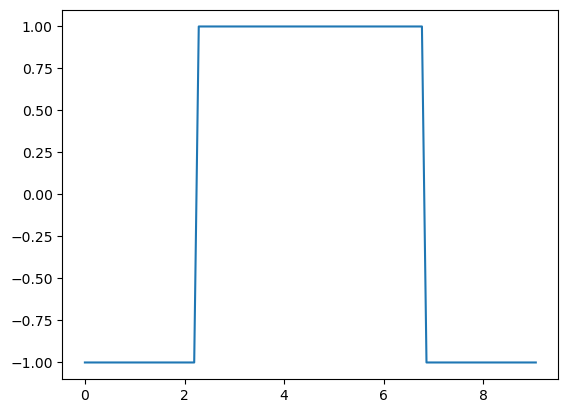

In [10]:
import matplotlib.pyplot as plt
plt.plot(time,U[0]);

Notice that just because the solver returned "Optimal solution found." does not mean that the solution is "good". For example, the quality of the solution will deteriorate if not enough control intervals are used.

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      282
Number of nonzeros in inequality constraint Jacobian.:       40
Number of nonzeros in Lagrangian Hessian.............:      211

Total number of variables............................:       61
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       48
Total number of inequality constraints...............:       40
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:       39
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

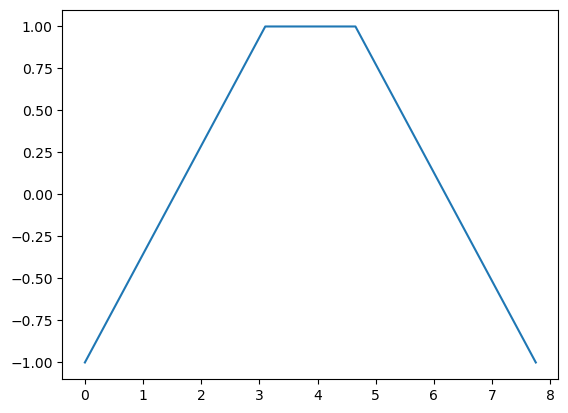

In [11]:
sol = ocp.solve_pybot(6,L,bounds)
time, X, X_dot, U = ocp.parse_sol(sol)
plt.plot(time,U[0]);

Lastly, `ocp.solve_pybot()` will return an error if the user-selected parameters are infeasible. 

In [12]:
sol = ocp.solve_pybot(100,2,bounds)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     4512
Number of nonzeros in inequality constraint Jacobian.:      604
Number of nonzeros in Lagrangian Hessian.............:     3501

Total number of variables............................:      907
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      612
Total number of inequality constraints...............:      604
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:      603
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

RuntimeError: Error in Opti::solve [OptiNode] at .../casadi/core/optistack.cpp:159:
.../casadi/core/optistack_internal.cpp:999: Assertion "return_success(accept_limit)" failed:
Solver failed. You may use opti.debug.value to investigate the latest values of variables. return_status is 'Infeasible_Problem_Detected'

## pybot_plot

First we will import the pybot_plot functions as pbPlot

In [14]:
import pybot_arm.pybot_plot as pbPlot
#import matplotlib.pyplot as plt

The read_csv_data function reads the output solution found by ocp. It reads the position, velocity, acceleration, and control output of the robot arm in spherical coordinates and converts the position, velocity, and acceleration to Cartesian coordinates for simplified plotting. 

In [15]:
# reading the csv file and converting data to Cartesian coordinates
position, velocity, acceleration, control, time = pbPlot.read_csv_data('pybot_L5.csv')

The create_plots function plots the useful forms of the position, velocity, acceleration, and control output of the robot arm vs time. For the position, the function plots a 3D plot of the position in Cartesian coordinates, along with 3 subplots of x, y, and z vs time. For velocity and acceleration, the function plots 3 subplots of the x, y, and z velocity or acceleration vs time. For the control output, the function plots 3 subplots of the spherical coordinate controls of the robot arm.

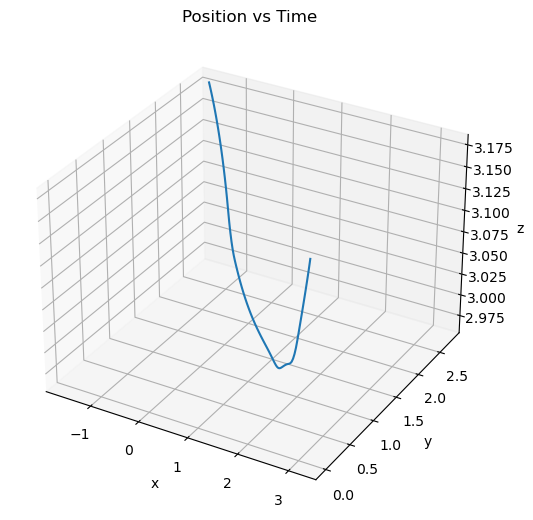

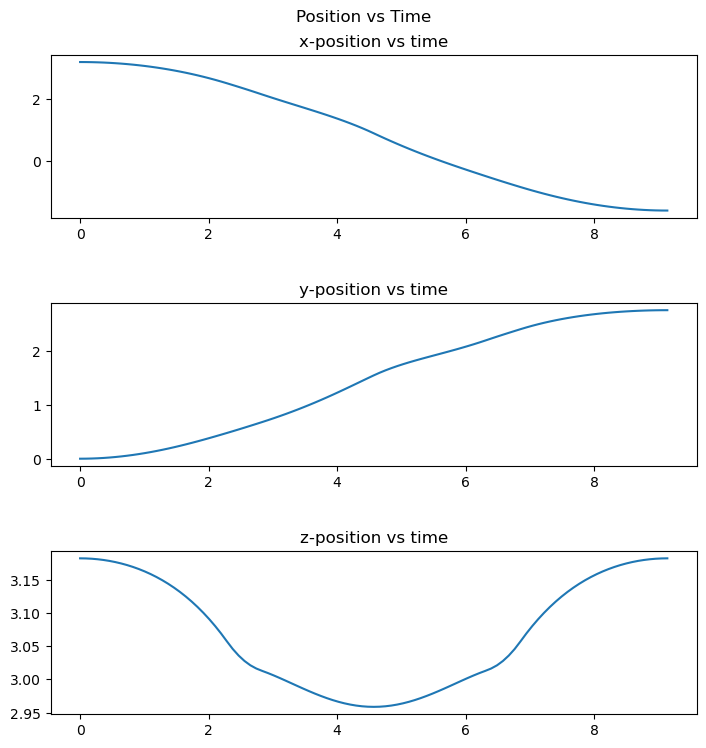

In [16]:
# plotting the 3D position and x, y, z subplots of position
pbPlot.create_plots(position, time, 'position')

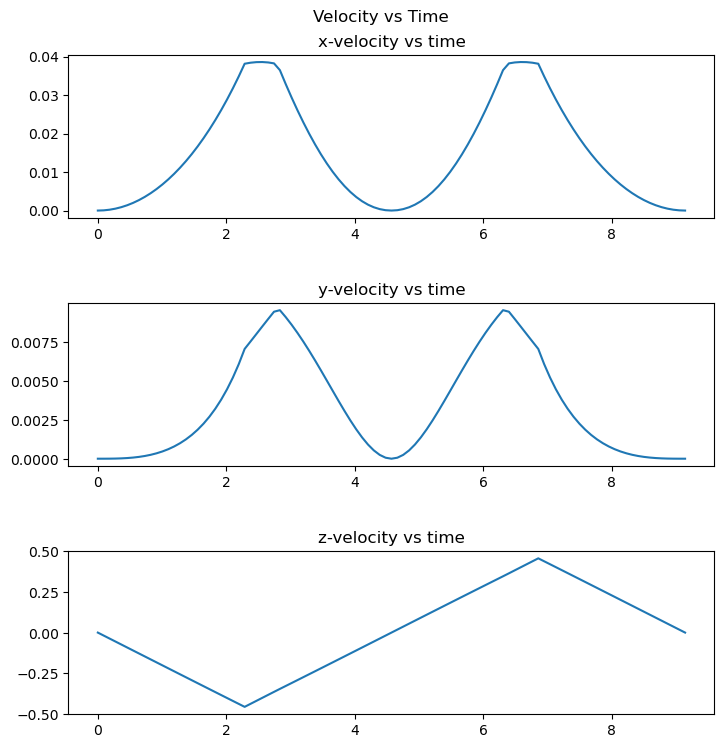

In [17]:
# plotting the x, y, z subplots of velocity
pbPlot.create_plots(velocity, time, 'velocity')

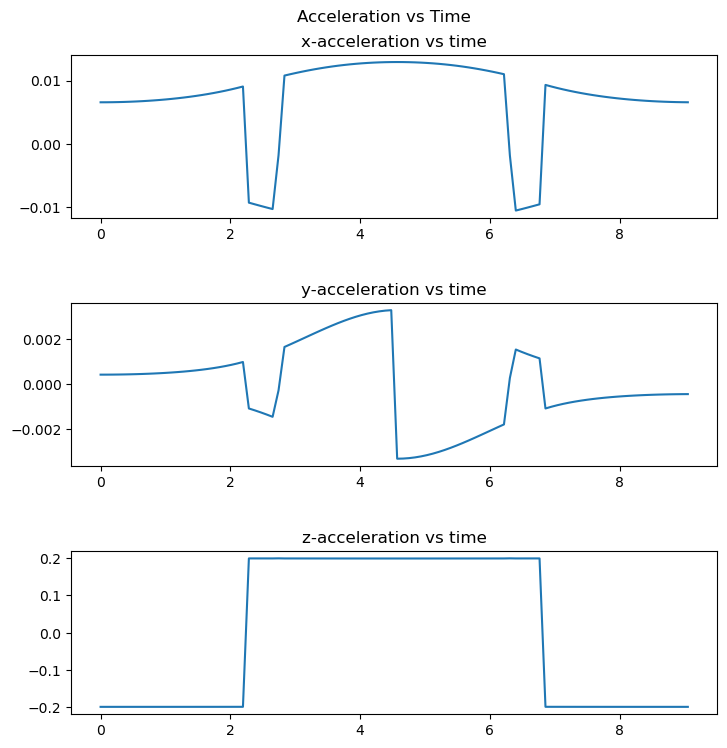

In [18]:
# plotting the x, y, z subplots of acceleration
pbPlot.create_plots(acceleration, time, 'acceleration')

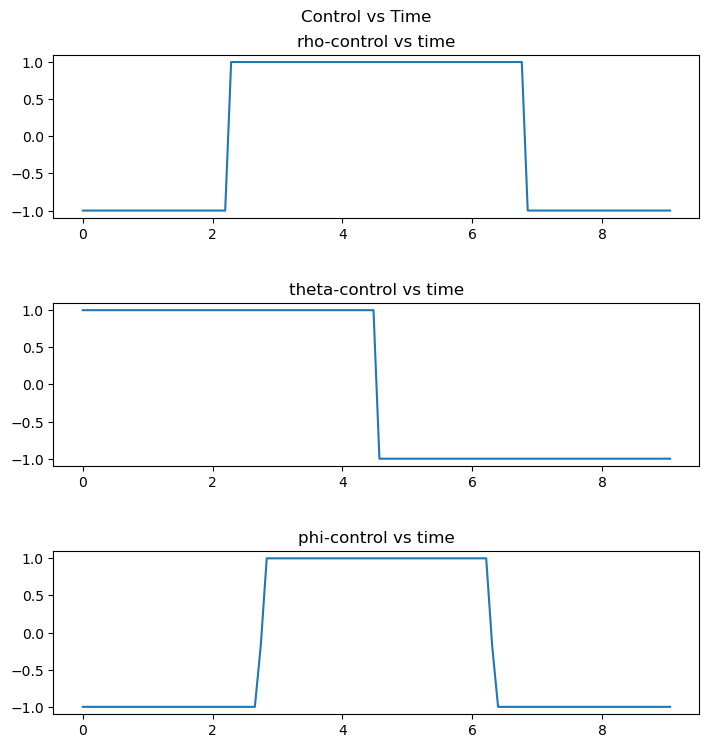

In [19]:
# plotting the rho, theta, phi subplots of control
pbPlot.create_plots(control, time, 'control')

The animate_3D function creates a 3D animation of the robot arms position in Cartesian coordinates. This animation will continue to loop until the stop option is pressed. The graph plot and axes can also be moved around to get a more desirable view of the animation. 

<IPython.core.display.Javascript object>


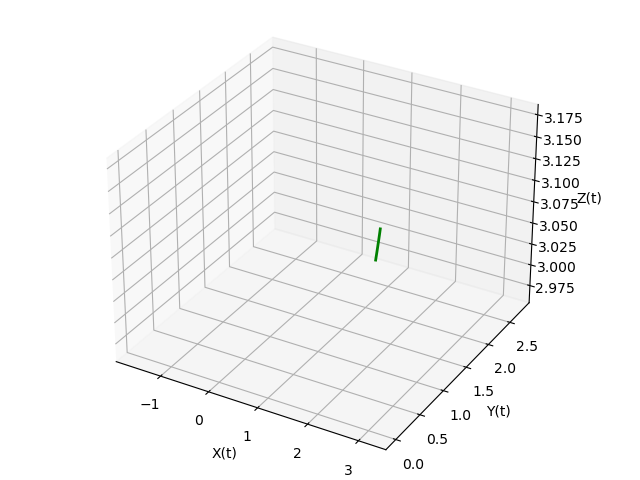

In [20]:
%matplotlib notebook
#creating the 3D animation of the position
animate = pbPlot.animate_3D(position)
animate